In [1]:
import numpy as np
from array import *
import copy
import random
import pandas as pd
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from skimage import io
tf.__version__

'2.3.1'

## data processing

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2,
                                   horizontal_flip = True)

training_data = train_datagen.flow_from_directory('data/Train/', target_size = (32, 32), class_mode = 'categorical',
                                                  batch_size = 32)

Found 73600 images belonging to 46 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory('data/Test/', target_size = (32, 32), class_mode = 'categorical',
                                             batch_size = 32)

Found 13800 images belonging to 46 classes.


In [5]:
valid_datagen = ImageDataGenerator(rescale = 1./255)
valid_data = valid_datagen.flow_from_directory('data/Valid/', target_size = (32, 32), class_mode = 'categorical',
                                             batch_size = 32)

Found 4600 images belonging to 46 classes.


## model building

In [6]:
classifier = tf.keras.models.Sequential()

In [7]:
classifier.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu',
                                      input_shape=(32, 32, 3)))
classifier.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'))
classifier.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu',))
classifier.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'))
classifier.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu',))
classifier.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'))

In [8]:
classifier.add(tf.keras.layers.Flatten())

In [16]:
classifier.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.3))
classifier.add(tf.keras.layers.Dense(units = 1024, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.5))
classifier.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 46, activation = 'softmax'))

In [17]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
H = classifier.fit(x = training_data, epochs = 50, validation_data = valid_data, steps_per_epoch = 1000)

Epoch 1/50
1000/1000 [==============================] - 66s 66ms/step - loss: 1.3439 - accuracy: 0.6056 - val_loss: 0.7603 - val_accuracy: 0.7611
Epoch 2/50
1000/1000 [==============================] - 69s 69ms/step - loss: 0.4345 - accuracy: 0.8655 - val_loss: 0.7093 - val_accuracy: 0.7870
Epoch 3/50
1000/1000 [==============================] - 70s 70ms/step - loss: 0.3121 - accuracy: 0.9041 - val_loss: 0.4527 - val_accuracy: 0.8650
Epoch 4/50
1000/1000 [==============================] - 76s 76ms/step - loss: 0.2559 - accuracy: 0.9199 - val_loss: 0.3661 - val_accuracy: 0.8898
Epoch 5/50
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2143 - accuracy: 0.9351 - val_loss: 0.3964 - val_accuracy: 0.8922
Epoch 6/50
1000/1000 [==============================] - 83s 83ms/step - loss: 0.2028 - accuracy: 0.9392 - val_loss: 0.3816 - val_accuracy: 0.8878
Epoch 7/50
1000/1000 [==============================] - 83s 83ms/step - loss: 0.1845 - accuracy: 0.9440 - val_loss: 0.3726 -

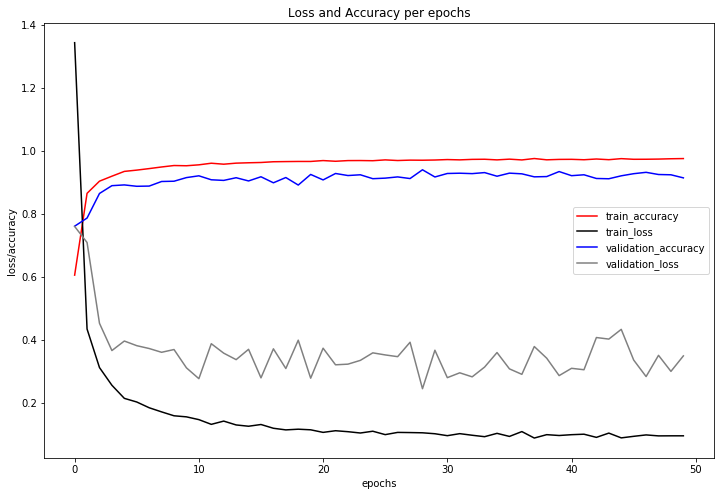

In [19]:
plt.figure(figsize = (12, 8))
plt.plot(H.history['accuracy'], c = 'red', label="train_accuracy")
plt.plot(H.history['loss'], c = 'black', label = 'train_loss')
plt.plot(H.history['val_accuracy'], c = 'blue', label = 'validation_accuracy')
plt.plot(H.history['val_loss'], c = 'gray', label = 'validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.title('Loss and Accuracy per epochs')
plt.legend(loc = 'center right')
plt.show()

In [21]:
_, accuracy = classifier.evaluate(test_data)
print('accuracy in test_set: %.2f' %(accuracy*100),'%')

432/432 [==============================] - 15s 36ms/step - loss: 0.0949 - accuracy: 0.9751
accuracy in test_set: 97.51 %


In [22]:
print(test_data.class_indices)

{'character_10_yna': 0, 'character_11_taamatar': 1, 'character_12_thaa': 2, 'character_13_daa': 3, 'character_14_dhaa': 4, 'character_15_adna': 5, 'character_16_tabala': 6, 'character_17_tha': 7, 'character_18_da': 8, 'character_19_dha': 9, 'character_1_ka': 10, 'character_20_na': 11, 'character_21_pa': 12, 'character_22_pha': 13, 'character_23_ba': 14, 'character_24_bha': 15, 'character_25_ma': 16, 'character_26_yaw': 17, 'character_27_ra': 18, 'character_28_la': 19, 'character_29_waw': 20, 'character_2_kha': 21, 'character_30_motosaw': 22, 'character_31_petchiryakha': 23, 'character_32_patalosaw': 24, 'character_33_ha': 25, 'character_34_chhya': 26, 'character_35_tra': 27, 'character_36_gya': 28, 'character_3_ga': 29, 'character_4_gha': 30, 'character_5_kna': 31, 'character_6_cha': 32, 'character_7_chha': 33, 'character_8_ja': 34, 'character_9_jha': 35, 'digit_0': 36, 'digit_1': 37, 'digit_2': 38, 'digit_3': 39, 'digit_4': 40, 'digit_5': 41, 'digit_6': 42, 'digit_7': 43, 'digit_8': 4

## single prediction

character_1_ka


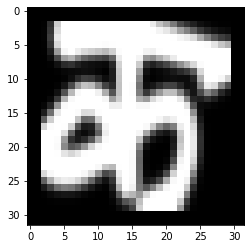

In [23]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
image1 = image.load_img(path='data/Test/character_1_ka/10967.png', target_size = (32, 32, 3))
image = image.img_to_array(image1)
image = np.expand_dims(image, axis = 0)
result = classifier.predict(image)
plt.imshow(image1)
for i in range(0, 46):
    if (result[0][i] == 1):
        print(list(training_data.class_indices.keys())[i])
        break

character_24_bha


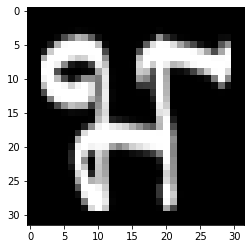

In [24]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
image1 = image.load_img(path='data/Test/character_24_bha/61479.png', target_size = (32, 32, 3))
image = image.img_to_array(image1)
image = np.expand_dims(image, axis = 0)
result = classifier.predict(image)
plt.imshow(image1)
for i in range(0, 46):
    if (result[0][i] == 1):
        print(list(training_data.class_indices.keys())[i])
        break

character_4_gha


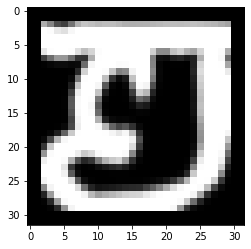

In [25]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
image1 = image.load_img(path='data/Test/character_4_gha/9197.png', target_size = (32, 32, 3))
image = image.img_to_array(image1)
image = np.expand_dims(image, axis = 0)
result = classifier.predict(image)
plt.imshow(image1)
for i in range(0, 46):
    if (result[0][i] == 1):
        print(list(training_data.class_indices.keys())[i])
        break